In [265]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import and merge datasets

In [313]:
df = pd.read_csv('data/athleteEvents.csv')
country = pd.read_excel('data/olympic_city_country.xlsx')
place = pd.read_csv('data/nocRegions.csv')
place.head()
place = place.drop(['region', 'notes'],axis=1)
newdf1 = df.merge(place, how='right')


# data pre-processing 

In [314]:
df = newdf1.dropna(subset=['Year','Games'])
df['Team']= df['Team'].str.replace('[#,@,&,0-9]', '',regex=True)
df['City']= df['City'].str.replace('[#,@,&,0-9]', '',regex=True)
df['Team'] = df['Team'].str.lower()
df['City'] = df['City'].str.lower()

country['City'] = country['City'].str.replace(r'[#,@,&,0-9]', '', regex=True)
country['City'] = country['City'].str.lower()

country['Country'] = country['Country'].str.replace(r'[#,@,&,0-9]', '', regex=True)
country['Country'] = country['Country'].str.lower()

In [315]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
dtype: int64

In [316]:
df=df.fillna(0)

## medal 

In [317]:
pd.unique(df['Medal'].values)

array([0, 'Bronze', 'Silver', 'Gold'], dtype=object)

In [318]:
len(pd.unique(df['NOC'].values))

229

## years

In [319]:
print(pd.unique(df['Year']))
print( "lenght is " , len(pd.unique(df['Year'])))

[1956. 1936. 1948. 1980. 1964. 1972. 1968. 2004. 2008. 2012. 2016. 1988.
 1960. 1996. 1984. 1952. 1992. 2000. 1976. 2014. 2006. 2010. 2002. 1994.
 1998. 1908. 1912. 1924. 1928. 1932. 1900. 1920. 1906. 1896. 1904.]
lenght is  35


In [320]:
df92=df[df['Year']==1900]
df20=df[df['Year']==2012]

In [321]:
pM = len(df92[df92["Sex"]=='M'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
PF= len(df92[df92["Sex"]=='F'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.9829545454545454  pourcentage of femel 0.017045454545454544


In [322]:
dt= {"Sex":["M","F"],'participation pourcentage':[pM,PF],"Year":[1900,1900]}
dt=pd.DataFrame(dt)
dt

,Sex,participation pourcentage,Year
0,M,0.982955,1900
1,F,0.017045,1900


In [323]:
PM = len(df20[df20["Sex"]=='M'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
pF= len(df20[df20["Sex"]=='F'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.9829545454545454  pourcentage of femel 0.017045454545454544


In [324]:
dt2= {"Sex":["M","F"],'participation pourcentage':[PM,pF],"Year":[2012,2012]}
dt2=pd.DataFrame(dt2)
dt2

,Sex,participation pourcentage,Year
0,M,0.550528,2012
1,F,0.449472,2012


# Slopgraph

In [325]:

frames = [dt2, dt]
result = pd.concat(frames,axis=0)
result
fm= result[result['Sex']=='M']
ff= result[result['Sex']=='F']

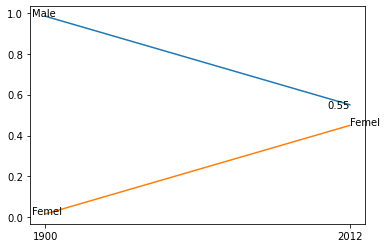

In [326]:
plt.plot(fm['Year'], fm['participation pourcentage'])
plt.plot(ff['Year'], ff['participation pourcentage'])
plt.xticks([1900, 2012])
plt.text(fm['Year'].values[0]+0.02, fm['participation pourcentage'].values[0], '{:,.2f}'.format(fm['participation pourcentage'].values[0]), va='center', ha='right')
plt.text(ff['Year'].values[0]+0.02, ff['participation pourcentage'].values[0], 'Femel')
plt.xticks([1900, 2012])
plt.text(fm['Year'].values[-1]-5, fm['participation pourcentage'].values[-1], 'Male')
plt.text(ff['Year'].values[-1]-5, ff['participation pourcentage'].values[-1], 'Femel')

plt.show()

https://news.ubc.ca/2014/09/30/gender-equality-olympics/

In [327]:
fm['Year'].values[0]

2012

## Pourcentage of medal wont by each gender

In [328]:
l =df.groupby(['Sex', 'Year','Medal']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count','Medal']]
l.head()

,Sex,Year,count,Medal
0,F,1900.0,20,0
1,F,1900.0,5,Bronze
2,F,1900.0,4,Gold
3,F,1900.0,4,Silver
4,F,1904.0,6,0


In [329]:
dfm= l[l['Year']==1900]
dfm.groupby(['Sex'])['count'].sum()

Sex
F      33
M    1903
Name: count, dtype: int64

In [330]:
dfm=dfm[dfm['Medal']!=0]
dfm.groupby(['Sex'])['count'].agg('sum')


Sex
F     13
M    591
Name: count, dtype: int64

In [331]:
dfm2= l[l['Year']==2012]
dfm2.groupby(['Sex'])['count'].sum()

Sex
F    5791
M    7093
Name: count, dtype: int64

In [332]:
dfm2=dfm2[dfm2['Medal']!=0]
print(dfm2.groupby(['Sex'])['count'].agg('sum'))

Sex
F     914
M    1023
Name: count, dtype: int64


In [333]:
dfm2= l[l['Year']==2012]
print(dfm2.groupby(['Sex'])['count'].sum())
dfm2=dfm2[dfm2['Medal']!=0]
print(dfm2.groupby(['Sex'])['count'].sum())

Sex
F    5791
M    7093
Name: count, dtype: int64
Sex
F     914
M    1023
Name: count, dtype: int64


explore the slopgraphe and the percentage to compare the percentage of femel and male participation during the time.
the pourcentage of medal from past to know. I will then explore the same direction for the country with most number of medail and also the country with less number of medail.  
If possible, show the distribution of medal get by both gender in the word map.  To get which country could affect the gender performance in the olympic game.  

<AxesSubplot:xlabel='Sex', ylabel='count'>

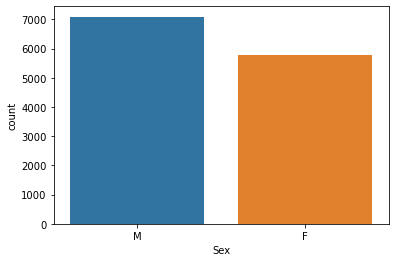

In [334]:
sns.countplot(data=df20, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

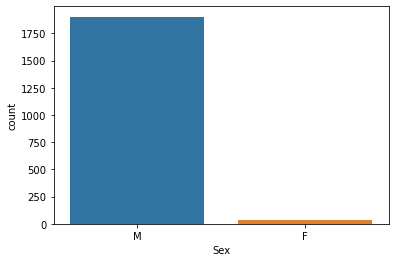

In [335]:
sns.countplot(data=df92, x='Sex')


**count the total number of men and winen who participate to the onlympic and show the number of medal got per gender.**

In [336]:
l =df.groupby(['Sex', 'Year']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count']]

In [337]:
l['Year'] = l['Year'].astype(int)
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     69 non-null     object
 1   Year    69 non-null     int64 
 2   count   69 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


<AxesSubplot:xlabel='Year', ylabel='count'>

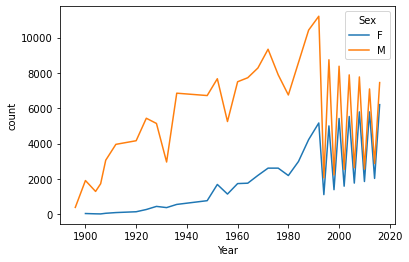

In [338]:
sns.lineplot(data=l, x='Year',y='count',hue='Sex')

In [339]:
l =df.groupby(['Sex', 'Year','Medal']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count','Medal']]
l

,Sex,Year,count,Medal
0,F,1900.0,20,0
1,F,1900.0,5,Bronze
2,F,1900.0,4,Gold
3,F,1900.0,4,Silver
4,F,1904.0,6,0
...,...,...,...,...
271,M,2014.0,110,Silver
272,M,2016.0,6400,0
273,M,2016.0,372,Bronze
274,M,2016.0,346,Gold


<AxesSubplot:xlabel='Year', ylabel='count'>

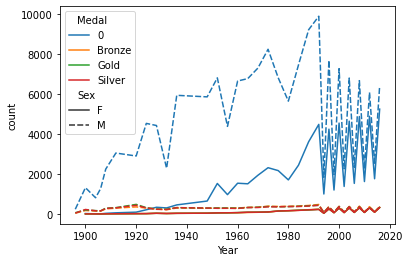

In [340]:
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex')

In [341]:
l=l[l['Year']>=1990]

<AxesSubplot:xlabel='Year', ylabel='count'>

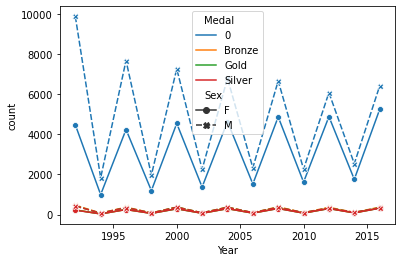

In [342]:
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex',markers=True)

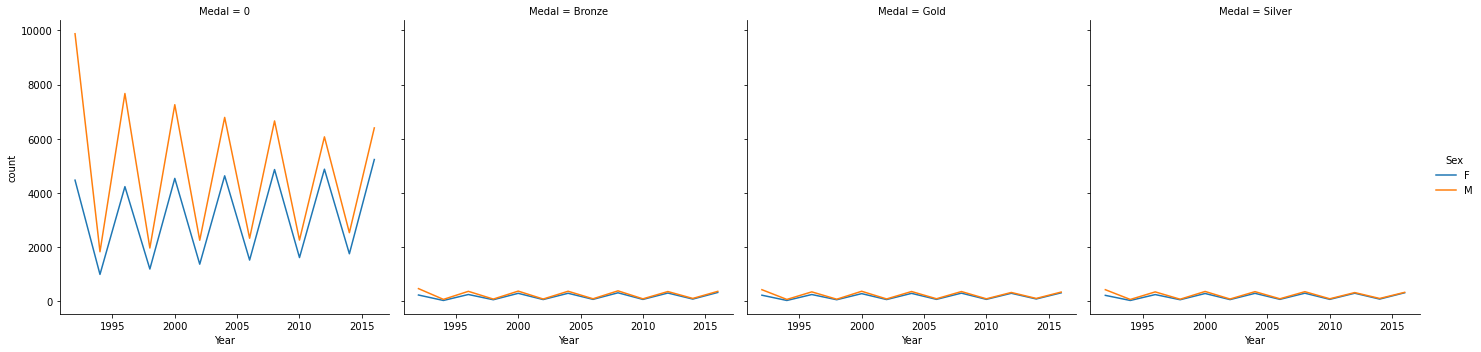

In [343]:
sns.relplot(
    data=l, x="Year", y="count",
    col="Medal", hue="Sex",
    kind="line"
)

# How does age and gender affect olympic sports performance?

# Does location really affect an athlete performance?

# How sport Location Affects athlete Performance?

# How does the athlete with more medal evolve in year?

In [344]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [345]:
tmp = df.groupby(['Year', 'City'])['Season'].value_counts()
df2 = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()

In [346]:
tmp = df.groupby(['Team', 'Medal'])['ID'].agg('count').dropna()
df3 = pd.DataFrame(tmp).reset_index()

In [347]:
dfG = df3[df3['Medal']=='Gold']
dfS = df3[df3['Medal']=='Silver']
dfB = df3[df3['Medal']=='Bronze']

def draw_map(dataset, title, colorscale):
    trace = go.Choropleth(
                locations = dataset['Team'],
                locationmode='country names',
                z = dataset['ID'],
                text = dataset['Team'],
                autocolorscale =False,
                reversescale = True,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Medals',
                    tickprefix = '')
            )
    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)

In [348]:


draw_map(dfG, "Countries with Gold Medals",'Greens')
draw_map(dfS, "Countries with Silver Medals",'Greys')
draw_map(dfB, "Countries with Bronze Medals",'Reds')

**1. What effect does the host country have in the medals won at the Olympics?**

**2. Is the performance of countries in Olympic games affected by the economic factors of the country?**

**3. Is the age of winning Olympics changing?**

# Number of  olympic games host by country

In [349]:
tmp = df.groupby(['City'])['Season'].value_counts()
df4 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()

newdf = df4.merge(country, how='right').dropna()
newdf.head()

,City,Season,Medal,Country
1,paris,Summer,7169.0,france
2,st. louis,Summer,1301.0,united states
3,london,Summer,22389.0,united kingdom
4,stockholm,Summer,4338.0,sweden
5,antwerpen,Summer,4292.0,belgium


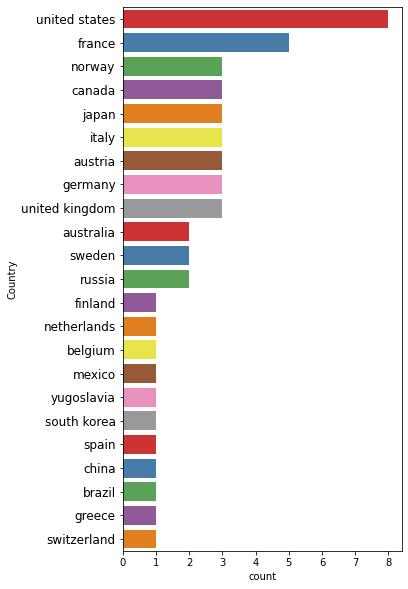

In [350]:
plt.figure(figsize=(5,10))
sns.countplot(data=newdf, y='Country', palette='Set1', order = newdf['Country'].value_counts().index)
plt.yticks( 
    horizontalalignment='right',
    fontsize='large'  
)
plt.show()

## Top 12 world countries that have wind more medail 

<Figure size 360x720 with 0 Axes>

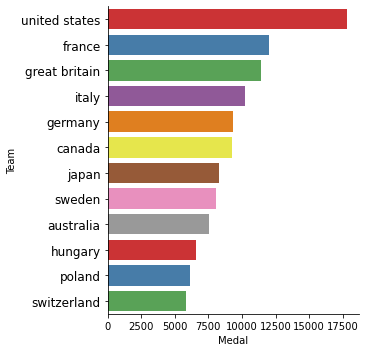

In [351]:
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()
l =df5.sort_values(by=['Medal'],ascending=False)
l = l.head(12)
plt.figure(figsize=(5,10))
sns.catplot(data=l, x="Medal", y="Team", kind="bar", palette='Set1')
plt.yticks( 
    horizontalalignment='right',
    fontsize='large'  
)
plt.show()

## Top African countries that have wind more medail 

<Figure size 360x720 with 0 Axes>

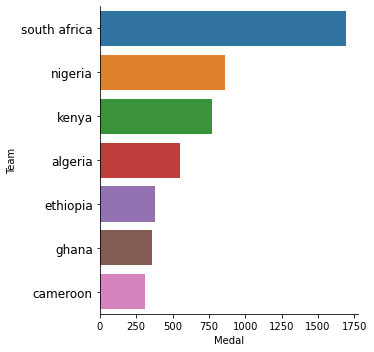

In [352]:
tmp = df.groupby(['Team'])['Medal'].agg('count').dropna()
df5 = pd.DataFrame(tmp).reset_index()
l =df5.sort_values(by=['Medal'],ascending=True)
l = l[(l['Team'] =='cameroon' )| (l['Team'] =='nigeria')| (l['Team'] =='algeria')|(l['Team'] =='south africa')| (l['Team'] =='kenya')|(l['Team'] =='ethiopia')|(l['Team'] =='ghana' )]
#l = l.head(12)
l = l.sort_values(by=['Medal'],ascending=False)
plt.figure(figsize=(5,10))
sns.catplot(data=l, x="Medal", y="Team", kind="bar")
plt.yticks( 
    horizontalalignment='right',
    fontsize='large'  
)
plt.show()

**If the Olympic performance of the riches countries is affected by the place where the games were organised. Therefore what about the country that can not organise the Olympic games?**

# Trend of the nomber of medal for the 10 top countries that have gain more medal

In [353]:
tmp = df.groupby(['Year', 'Team', 'City'])['Medal'].agg('count').dropna()
df6 = pd.DataFrame(tmp).reset_index()
l =df6.sort_values(by=['Medal'],ascending=False)
newdfl = l.merge(country, how='right').dropna()
df8= newdf.copy()

In [354]:
newdfl

,Year,Team,City,Medal,Country
1,1900.0,france,paris,679.0,france
2,1924.0,france,paris,620.0,france
3,1924.0,united states,paris,447.0,france
4,1924.0,great britain,paris,411.0,france
5,1924.0,italy,paris,330.0,france
...,...,...,...,...,...
6799,1948.0,hungary-,sankt moritz,4.0,switzerland
6800,1948.0,lebanon,sankt moritz,3.0,switzerland
6801,1928.0,latvia,sankt moritz,3.0,switzerland
6802,1948.0,greece,sankt moritz,2.0,switzerland


In [355]:
newdfl[newdfl['Country']==newdfl['Team'] ]['City']='Home'
newdfl[newdfl['Country']!=newdfl['Team'] ]['City']='Away'
# newdfl[newdfl['Country']==['United States']]= 'Home'
#newdfl[newdfl['Country']!='United States']= 'Away'

In [366]:
newdfl[newdfl['Team']=='france']

,Year,Team,City,Medal,Country
1,1900.0,france,paris,679.0,france
2,1924.0,france,paris,620.0,france
278,1904.0,france,st. louis,1.0,united states
288,2012.0,france,london,422.0,united kingdom
289,1948.0,france,london,421.0,united kingdom
...,...,...,...,...,...
6388,1980.0,france,moskva,200.0,russia
6466,2006.0,france,torino,155.0,italy
6556,1960.0,france,roma,353.0,italy
6743,1948.0,france,sankt moritz,48.0,switzerland
